# Indexing is very important!!!!1

In [1]:
import numpy as np
import pandas as pd
import os
from shutil import copyfile
import pickle
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import colorlover as cl


import neuro_morpho_toolbox as nmt
%matplotlib inline
import pickle
pickle_in = open("/home/penglab/FeaCal/all_ns.pickle","rb")
[ns] = pickle.load(pickle_in)


/home/penglab/anaconda3/lib/python3.7/site-packages/neuro_morpho_toolbox-0.1-py3.7.egg/neuro_morpho_toolbox/
Loading CCF Atlas data...
Loading time: 0.88
Loading CCF brain structure data...
Loading time: 0.00


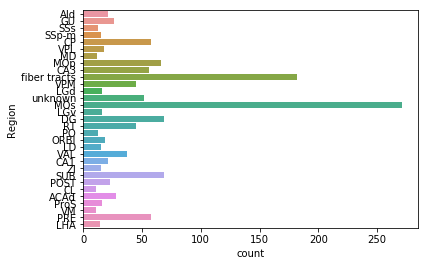

In [2]:
sf = ns.features['soma_features'].region
ct = sf["Region"].value_counts().sort_values(ascending=False)
_ = sns.countplot(y="Region", 
                  data=sf.loc[sf.Region.isin(ct.index[ct>10])],
                 )

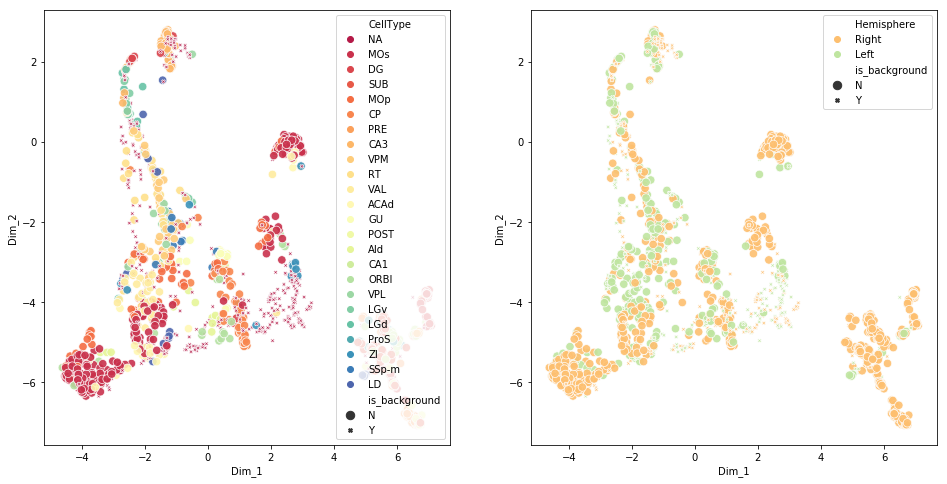

In [3]:
_ = ns.ReduceDimUMAP(feature_set="projection_features", n_neighbors=100)
_ = ns.FeatureScatter(["CellType", "Hemisphere"], map="UMAP")

### Speed of parallel
* for an array testA = nmt.annotation.array[55:90,120:167,179:231].copy()
    * There are 85540 points inside
    * Takes 29.143057346343994 second to run the code.
* For the original array
    * There are 77045760 points inside
    * It may take about 7.25 hours to store all the point. We will try that this evening.

In [14]:
testA = nmt.annotation.array[100:150,100:160,100:170].copy()

In [16]:
x_block = [range(testA.shape[0])[i:i + 30] for i in range(0, testA.shape[0], 30)]
y_block = [range(testA.shape[1])[i:i + 30] for i in range(0, testA.shape[1], 30)]
z_block = [range(testA.shape[2])[i:i + 30] for i in range(0, testA.shape[2], 30)]

In [17]:
import multiprocessing
import time
def Contour_block6(Temp_arr,x_lower,x_upper,y_lower,y_upper,z_lower,z_upper):#,x_s,y_s,z_s):
    mask_Temp = np.zeros((Temp_arr.shape)) 
    mask_Temp[x_lower:x_upper,y_lower:y_upper,z_lower:z_upper]=1
    
    co_1,co_2,co_3 = np.where(np.multiply(mask_Temp,Temp_arr)!=0) 
    block_list=[]
    for iter_COR in range(len(co_1)):
        x_in = co_1[iter_COR]
        y_in = co_2[iter_COR]
        z_in = co_3[iter_COR]
        centerV =  Temp_arr[x_in,y_in, z_in]  
        x1yz = Temp_arr[min(Temp_arr.shape[0]-1,x_in+1),y_in,z_in]  # +1,0,0
        x2yz = Temp_arr[max(0,x_in-1),y_in,z_in]                    # -1,0,0
        xy1z = Temp_arr[x_in,min(Temp_arr.shape[1]-1,y_in+1),z_in]  # 0,+1,0
        xy2z = Temp_arr[x_in,max(0,y_in-1),z_in]                    # 0,-1,0
        xyz1 = Temp_arr[x_in,y_in,min(Temp_arr.shape[2]-1,z_in+1)]  # 0,0,+1
        xyz2 = Temp_arr[x_in,y_in,max(0,z_in-1)]                    # 0,0,-1
        if not all(v == centerV for v in [x1yz,x2yz,xy1z,xy2z,xyz1,xyz2]):
            print(str([centerV,x1yz,x2yz,xy1z,xy2z,xyz1,xyz2]))
            block_list.append([x_in,y_in,z_in])
    return (block_list)



start = time.perf_counter ()
start=time.time()


result_list=[]   
temp_array = testA.copy()
for iter_X in x_block:
    for iter_Y in y_block:
        for iter_Z in z_block:
            x_l = iter_X[0]
            x_u = iter_X[-1]+1
            y_l = iter_Y[0]
            y_u = iter_Y[-1]+1
            z_l = iter_Z[0]
            z_u = iter_Z[-1]+1

            result_list.append(Contour_block6(temp_array,x_l,x_u,y_l,y_u,z_l,z_u))#,iter_X[0],iter_Y[0],iter_Z[0]))
            #print('X range: '+str(iter_X[0])+':'+ str(iter_X[-1]+1)+'; Y range: '+str(iter_Y[0])+':'+ str(iter_Y[-1]+1)+'; Z range: '+str(iter_Z[0])+':'+ str(iter_Z[-1]+1))
print('Have finished the checking part')

elapsed = (time.time() - start)
print('Time needed to run the whole matrix is '+ str(elapsed))



[656, 656, 656, 656, 656, 656, 0]
[656, 656, 656, 656, 656, 656, 0]
[656, 656, 656, 656, 0, 656, 0]
[656, 656, 656, 656, 0, 656, 0]
[656, 656, 656, 656, 656, 656, 0]
[656, 656, 656, 656, 0, 656, 0]
[656, 656, 656, 656, 0, 656, 0]
[656, 656, 656, 656, 656, 656, 0]
[656, 656, 656, 656, 0, 656, 0]
[656, 962, 656, 656, 656, 962, 656]
[656, 656, 656, 656, 0, 656, 0]
[656, 962, 656, 962, 656, 962, 656]
[656, 656, 656, 656, 656, 656, 0]
[656, 962, 656, 656, 656, 962, 656]
[962, 962, 962, 962, 656, 962, 656]
[656, 656, 656, 656, 0, 656, 0]
[656, 962, 656, 962, 656, 962, 656]
[962, 962, 962, 962, 962, 962, 656]
[656, 656, 656, 656, 656, 656, 0]
[656, 962, 656, 962, 656, 962, 656]
[962, 962, 962, 962, 656, 962, 656]
[656, 656, 656, 656, 656, 656, 0]
[656, 656, 656, 656, 656, 962, 656]
[962, 962, 962, 962, 656, 962, 656]
[656, 656, 656, 656, 0, 656, 0]
[656, 962, 656, 656, 656, 962, 656]
[962, 962, 962, 962, 962, 962, 656]
[656, 656, 656, 656, 656, 656, 0]
[656, 962, 656, 962, 656, 962, 656]
[962

[656, 943, 656, 962, 656, 962, 320]
[962, 962, 656, 962, 656, 962, 656]
[320, 320, 320, 320, 320, 320, 0]
[320, 320, 656, 320, 320, 320, 320]
[320, 320, 656, 320, 320, 962, 320]
[962, 943, 656, 962, 656, 962, 320]
[320, 320, 0, 320, 0, 320, 0]
[320, 943, 656, 943, 320, 962, 320]
[962, 943, 962, 962, 962, 962, 320]
[320, 320, 320, 320, 320, 320, 0]
[320, 943, 320, 943, 320, 943, 320]
[943, 943, 656, 943, 320, 962, 320]
[962, 943, 962, 962, 962, 962, 943]
[962, 943, 962, 962, 962, 962, 962]
[320, 320, 0, 320, 0, 320, 0]
[320, 320, 320, 320, 320, 943, 320]
[943, 943, 320, 943, 320, 943, 320]
[943, 943, 943, 943, 943, 962, 943]
[962, 943, 962, 962, 962, 962, 943]
[320, 320, 320, 320, 320, 320, 0]
[320, 943, 320, 320, 320, 943, 320]
[943, 943, 656, 943, 943, 943, 320]
[943, 943, 943, 943, 943, 962, 943]
[962, 943, 962, 962, 962, 962, 943]
[320, 320, 0, 320, 0, 320, 0]
[320, 943, 320, 943, 320, 943, 320]
[943, 943, 943, 943, 943, 943, 320]
[943, 943, 962, 943, 943, 962, 943]
[962, 943, 962, 

[648, 648, 943, 648, 648, 648, 943]
[648, 648, 767, 648, 648, 767, 648]
[767, 648, 767, 767, 648, 767, 648]
[320, 943, 320, 320, 320, 943, 320]
[943, 943, 320, 943, 320, 943, 320]
[943, 648, 943, 648, 943, 648, 943]
[648, 648, 648, 648, 648, 648, 943]
[648, 648, 767, 648, 648, 767, 648]
[767, 648, 767, 767, 767, 767, 648]
[320, 943, 320, 943, 320, 943, 320]
[943, 943, 320, 943, 943, 943, 320]
[943, 648, 943, 943, 943, 648, 943]
[648, 648, 943, 648, 943, 648, 943]
[648, 648, 767, 648, 648, 767, 648]
[767, 767, 767, 767, 767, 767, 648]
[320, 320, 320, 320, 320, 943, 320]
[943, 943, 320, 943, 320, 943, 320]
[943, 943, 320, 943, 943, 943, 943]
[943, 648, 943, 648, 943, 648, 943]
[648, 648, 943, 648, 648, 648, 943]
[648, 648, 767, 648, 648, 767, 648]
[767, 648, 767, 648, 767, 767, 648]
[320, 320, 0, 320, 320, 320, 0]
[320, 320, 320, 320, 320, 943, 320]
[943, 943, 320, 943, 943, 943, 320]
[943, 943, 962, 943, 943, 943, 943]
[943, 943, 962, 943, 943, 962, 943]
[962, 943, 962, 962, 962, 962, 9

[767, 767, 962, 767, 962, 767, 962]
[767, 767, 962, 767, 767, 767, 767]
[962, 962, 962, 962, 962, 767, 962]
[767, 767, 962, 767, 767, 767, 962]
[962, 767, 962, 767, 962, 767, 962]
[767, 767, 767, 767, 767, 767, 962]
[962, 767, 962, 767, 962, 767, 962]
[767, 767, 962, 767, 962, 767, 962]
[962, 962, 962, 962, 962, 767, 962]
[767, 767, 962, 767, 962, 767, 962]
[962, 767, 962, 767, 962, 767, 962]
[767, 767, 767, 767, 767, 767, 962]
[962, 962, 962, 962, 962, 767, 962]
[767, 767, 962, 767, 962, 767, 962]
[962, 767, 962, 767, 962, 767, 962]
[767, 767, 962, 767, 767, 767, 962]
[962, 962, 962, 962, 962, 767, 962]
[767, 767, 962, 767, 962, 767, 962]
[767, 1021, 767, 767, 767, 767, 767]
[962, 962, 962, 962, 962, 767, 962]
[767, 767, 962, 767, 767, 767, 962]
[767, 1021, 767, 767, 767, 767, 767]
[767, 1021, 767, 1021, 767, 1021, 767]
[962, 767, 962, 767, 962, 767, 962]
[767, 767, 767, 767, 767, 767, 962]
[767, 1021, 767, 767, 767, 767, 767]
[767, 1021, 767, 1021, 767, 1021, 767]
[1021, 1021, 767, 1

[767, 1021, 767, 1021, 767, 1021, 767]
[1021, 1021, 767, 1021, 767, 1021, 767]
[1021, 1021, 1021, 1021, 767, 1021, 1021]
[767, 1021, 767, 1021, 767, 1021, 767]
[1021, 1021, 767, 1021, 767, 1021, 767]
[767, 1021, 767, 1021, 767, 767, 767]
[767, 1021, 767, 1021, 767, 1021, 767]
[1021, 1021, 1021, 1021, 767, 1021, 767]
[767, 767, 767, 1021, 767, 1021, 767]
[1021, 1021, 767, 1021, 767, 1021, 767]
[1021, 1021, 1021, 1021, 767, 1021, 1021]
[767, 1021, 767, 1021, 767, 1021, 767]
[1021, 1021, 767, 1021, 767, 1021, 767]
[767, 767, 767, 1021, 767, 767, 767]
[767, 1021, 767, 1021, 767, 1021, 767]
[1021, 1021, 767, 1021, 767, 1021, 767]
[767, 767, 767, 767, 767, 1021, 767]
[1021, 1021, 767, 1021, 767, 1021, 767]
[1021, 1021, 1021, 1021, 767, 1021, 1021]
[767, 1021, 767, 1021, 767, 1021, 767]
[1021, 1021, 1021, 1021, 1021, 1021, 767]
[767, 1021, 767, 1021, 767, 1021, 767]
[1021, 1021, 1021, 1021, 767, 1021, 767]
[767, 767, 767, 767, 767, 1021, 767]
[1021, 1021, 767, 1021, 767, 1021, 767]
[767, 1021

[767, 767, 767, 1021, 767, 767, 767]
[767, 767, 767, 1021, 767, 767, 767]
[767, 1021, 767, 1021, 767, 1021, 767]
[1021, 1021, 1021, 1021, 767, 1021, 767]
[767, 767, 767, 1021, 767, 1021, 767]
[1021, 1021, 767, 1021, 767, 1021, 767]
[1021, 1021, 1021, 1021, 767, 1021, 1021]
[767, 1021, 767, 1021, 767, 1021, 767]
[1021, 1021, 767, 1021, 767, 1021, 767]
[767, 767, 767, 1021, 767, 767, 767]
[767, 1021, 767, 1021, 767, 1021, 767]
[1021, 1021, 767, 1021, 767, 1021, 767]
[767, 767, 767, 1021, 767, 1021, 767]
[1021, 1021, 767, 1021, 767, 1021, 767]
[1021, 1021, 767, 1021, 767, 1021, 1021]
[767, 767, 767, 1021, 767, 767, 767]
[767, 1021, 767, 1021, 767, 1021, 767]
[1021, 1021, 767, 1021, 767, 1021, 767]
[1021, 1021, 767, 1021, 767, 1021, 767]
[1021, 1021, 1021, 1021, 767, 1021, 1021]
[1021, 1021, 526157196, 526157196, 1021, 1021, 1021]
[1021, 1021, 1021, 526157196, 1021, 1021, 1021]
[1021, 1021, 526157196, 526157196, 1021, 526157196, 1021]
[526157196, 526157196, 526157196, 526157196, 1021, 5261

[320, 320, 0, 320, 320, 656, 320]
[656, 320, 656, 320, 656, 656, 320]
[656, 320, 656, 320, 656, 656, 656]
[656, 962, 656, 656, 656, 656, 656]
[656, 962, 656, 656, 962, 962, 656]
[962, 962, 962, 962, 962, 962, 656]
[962, 962, 328, 328, 962, 328, 962]
[328, 328, 328, 328, 962, 328, 962]
[320, 320, 0, 0, 320, 320, 0]
[320, 320, 656, 320, 656, 320, 320]
[320, 320, 656, 320, 656, 656, 320]
[656, 320, 656, 656, 656, 656, 320]
[656, 962, 656, 656, 656, 656, 656]
[656, 962, 656, 656, 656, 962, 656]
[962, 962, 656, 962, 962, 962, 656]
[962, 962, 962, 328, 962, 962, 962]
[962, 962, 962, 328, 962, 328, 962]
[328, 328, 328, 328, 962, 328, 962]
[320, 320, 0, 320, 320, 320, 0]
[320, 320, 656, 320, 320, 656, 320]
[656, 320, 656, 656, 656, 656, 320]
[656, 962, 656, 656, 656, 962, 656]
[962, 962, 656, 656, 962, 962, 656]
[962, 962, 656, 962, 962, 962, 962]
[962, 962, 962, 328, 962, 328, 962]
[328, 328, 328, 328, 962, 328, 962]
[328, 328, 328, 328, 962, 328, 328]
[320, 320, 0, 320, 320, 320, 0]
[320, 32

[320, 943, 320, 320, 320, 943, 320]
[943, 943, 320, 943, 943, 943, 320]
[943, 943, 962, 943, 943, 962, 943]
[962, 943, 962, 943, 962, 962, 943]
[962, 767, 962, 962, 962, 767, 962]
[767, 767, 962, 767, 767, 767, 962]
[320, 320, 0, 320, 320, 320, 0]
[320, 943, 320, 320, 320, 943, 320]
[943, 943, 320, 943, 943, 943, 320]
[943, 943, 962, 943, 962, 962, 943]
[962, 943, 962, 962, 962, 962, 943]
[962, 767, 962, 962, 962, 767, 962]
[767, 767, 962, 767, 767, 767, 962]
[320, 320, 0, 320, 320, 320, 0]
[320, 943, 320, 320, 320, 943, 320]
[943, 943, 320, 943, 943, 943, 320]
[943, 943, 962, 943, 943, 962, 943]
[962, 943, 962, 962, 962, 962, 943]
[962, 767, 962, 962, 962, 767, 962]
[767, 767, 962, 767, 767, 767, 962]
[320, 320, 0, 320, 320, 320, 0]
[320, 943, 320, 320, 320, 943, 320]
[943, 943, 320, 943, 943, 943, 320]
[943, 943, 962, 943, 943, 962, 943]
[962, 943, 962, 962, 962, 962, 943]
[962, 767, 962, 962, 962, 767, 962]
[767, 767, 962, 767, 767, 767, 962]
[320, 320, 0, 320, 320, 320, 0]
[320, 94

[943, 943, 943, 328, 943, 328, 943]
[328, 943, 328, 328, 943, 328, 943]
[328, 328, 328, 328, 943, 328, 328]
[328, 1101, 328, 328, 328, 1101, 328]
[1101, 1101, 328, 1101, 1101, 1101, 328]
[320, 320, 0, 0, 320, 320, 0]
[320, 943, 320, 320, 320, 320, 320]
[320, 943, 320, 320, 943, 943, 320]
[943, 943, 943, 943, 943, 943, 320]
[943, 943, 943, 328, 943, 943, 943]
[943, 943, 943, 328, 943, 328, 943]
[328, 328, 328, 328, 943, 328, 943]
[328, 1101, 328, 328, 328, 1101, 328]
[1101, 1101, 328, 328, 1101, 1101, 328]
[320, 320, 0, 320, 320, 320, 0]
[320, 943, 320, 320, 320, 943, 320]
[943, 943, 320, 943, 943, 943, 320]
[943, 943, 943, 943, 943, 328, 943]
[328, 328, 328, 328, 943, 328, 943]
[328, 328, 328, 328, 943, 328, 328]
[328, 1101, 328, 328, 328, 328, 328]
[328, 1101, 328, 328, 1101, 1101, 328]
[1101, 1101, 1101, 1101, 1101, 1101, 328]
[320, 320, 320, 320, 320, 943, 320]
[943, 943, 320, 943, 943, 943, 320]
[943, 943, 943, 943, 943, 648, 943]
[648, 648, 943, 648, 943, 648, 943]
[648, 648, 767,

[328, 1101, 328, 328, 328, 1101, 328]
[1101, 1101, 328, 328, 1101, 1101, 328]
[1101, 1101, 328, 1101, 1101, 1101, 1101]
[1101, 1101, 328, 1101, 1101, 1101, 1101]
[1101, 1101, 1101, 1101, 1101, 630, 1101]
[630, 630, 630, 630, 630, 630, 1101]
[328, 328, 996, 328, 328, 328, 996]
[328, 1101, 328, 328, 328, 328, 328]
[328, 1101, 328, 328, 1101, 1101, 328]
[1101, 1101, 328, 328, 1101, 1101, 328]
[1101, 1101, 328, 1101, 1101, 1101, 1101]
[1101, 1101, 328, 1101, 1101, 1101, 1101]
[1101, 1101, 630, 1101, 1101, 630, 1101]
[630, 630, 630, 630, 630, 630, 1101]
[328, 328, 996, 996, 328, 328, 996]
[328, 328, 996, 328, 328, 328, 328]
[328, 1101, 328, 328, 328, 328, 328]
[328, 1101, 328, 328, 1101, 1101, 328]
[1101, 1101, 328, 328, 1101, 1101, 328]
[1101, 1101, 328, 1101, 1101, 1101, 1101]
[1101, 1101, 328, 1101, 1101, 1101, 1101]
[1101, 630, 630, 630, 1101, 630, 1101]
[630, 630, 630, 630, 630, 630, 1101]
[996, 328, 996, 996, 328, 328, 996]
[328, 328, 996, 328, 328, 328, 996]
[328, 1101, 328, 328, 328

[1101, 1101, 1101, 1101, 1101, 630, 1101]
[630, 630, 630, 630, 1101, 630, 1101]
[767, 767, 767, 1101, 767, 1101, 767]
[1101, 1101, 1101, 1101, 767, 1101, 767]
[1101, 1101, 1101, 1101, 767, 1101, 1101]
[1101, 1101, 1101, 1101, 1101, 630, 1101]
[630, 630, 630, 630, 630, 630, 1101]
[767, 767, 767, 1101, 767, 767, 767]
[767, 1101, 1101, 1101, 767, 1101, 767]
[1101, 1101, 1101, 1101, 767, 1101, 767]
[1101, 1101, 1101, 1101, 1101, 630, 1101]
[630, 630, 630, 630, 630, 630, 1101]
[767, 767, 767, 1101, 767, 1101, 767]
[1101, 767, 1101, 1101, 767, 1101, 767]
[1101, 1101, 1101, 1101, 767, 1101, 1101]
[1101, 1101, 1101, 630, 1101, 630, 1101]
[630, 630, 630, 630, 630, 630, 1101]
[767, 767, 1101, 1101, 767, 1101, 767]
[1101, 1101, 1101, 1101, 767, 1101, 767]
[1101, 1101, 1101, 1101, 1101, 630, 1101]
[630, 630, 630, 630, 1101, 630, 1101]
[1101, 1101, 1101, 1101, 767, 1101, 767]
[1101, 1101, 1101, 630, 1101, 630, 1101]
[630, 630, 630, 630, 630, 630, 1101]
[1101, 1101, 1101, 1101, 1101, 630, 1101]
[630

[1101, 1101, 1101, 1101, 1101, 630, 1101]
[630, 630, 630, 630, 1101, 630, 1101]
[1101, 630, 630, 630, 1101, 630, 1101]
[630, 630, 630, 630, 630, 630, 1101]
[1101, 1101, 1101, 1101, 1101, 630, 1101]
[630, 630, 630, 630, 1101, 630, 1101]
[1101, 1101, 1101, 800, 1101, 1101, 1101]
[1101, 800, 1101, 630, 1101, 630, 1101]
[630, 630, 630, 630, 630, 630, 1101]
[1101, 1101, 1101, 1101, 1101, 800, 1101]
[800, 800, 1101, 800, 1101, 630, 1101]
[630, 630, 800, 630, 1101, 630, 800]
[1101, 1101, 1101, 800, 1101, 800, 1101]
[800, 800, 800, 630, 800, 630, 1101]
[630, 630, 630, 630, 630, 630, 800]
[1101, 1101, 1101, 1101, 1101, 800, 1101]
[800, 800, 800, 800, 1101, 630, 1101]
[630, 630, 800, 630, 800, 630, 800]
[767, 1021, 767, 767, 767, 1021, 767]
[1021, 1021, 1021, 1021, 1021, 1021, 767]
[767, 1021, 767, 1021, 767, 1021, 767]
[1021, 1021, 1021, 1021, 1021, 1021, 767]
[1021, 1021, 1021, 783, 1021, 1021, 1021]
[1021, 1021, 1021, 783, 1021, 1021, 1021]
[1021, 1021, 1021, 783, 1021, 1021, 1021]
[1021, 102

[440, 440, 440, 440, 440, 440, 783]
[648, 648, 767, 648, 767, 767, 648]
[767, 648, 767, 767, 767, 767, 648]
[767, 767, 767, 1101, 767, 767, 767]
[767, 1021, 767, 1101, 767, 1021, 767]
[1021, 783, 1101, 783, 1021, 783, 767]
[783, 783, 783, 783, 1021, 783, 1021]
[783, 783, 783, 440, 783, 440, 783]
[440, 440, 440, 440, 783, 440, 783]
[648, 648, 767, 648, 648, 767, 648]
[767, 648, 767, 767, 767, 767, 648]
[767, 767, 767, 767, 767, 1101, 767]
[1101, 767, 1101, 1101, 767, 1101, 767]
[1101, 783, 1101, 1101, 767, 783, 1101]
[783, 783, 1101, 783, 1021, 783, 1101]
[783, 783, 1101, 783, 783, 783, 783]
[783, 783, 783, 783, 783, 440, 783]
[440, 440, 440, 440, 783, 440, 783]
[648, 648, 648, 648, 648, 767, 648]
[767, 648, 767, 1101, 767, 767, 648]
[767, 767, 767, 1101, 767, 767, 767]
[767, 1101, 1101, 1101, 767, 1101, 767]
[1101, 1101, 1101, 1101, 1101, 1101, 767]
[1101, 783, 1101, 1101, 1101, 783, 1101]
[783, 783, 1101, 783, 783, 783, 1101]
[783, 783, 1101, 783, 783, 783, 783]
[783, 783, 783, 440, 7

[320, 320, 0, 320, 320, 320, 0]
[320, 943, 320, 943, 320, 943, 320]
[943, 943, 943, 943, 943, 943, 320]
[320, 320, 320, 320, 320, 320, 0]
[320, 943, 320, 943, 320, 943, 320]
[943, 943, 943, 943, 320, 943, 320]
[320, 320, 320, 320, 0, 320, 0]
[320, 943, 320, 943, 320, 943, 320]
[943, 943, 320, 943, 320, 943, 320]
[320, 320, 0, 320, 0, 320, 0]
[320, 320, 320, 320, 320, 943, 320]
[943, 943, 320, 943, 320, 943, 320]
[320, 320, 320, 320, 320, 320, 0]
[320, 943, 320, 943, 320, 943, 320]
[943, 943, 943, 943, 943, 943, 320]
[320, 320, 320, 320, 0, 320, 0]
[320, 943, 320, 943, 320, 943, 320]
[943, 943, 320, 943, 320, 943, 320]
[320, 320, 0, 320, 0, 320, 0]
[320, 943, 320, 943, 320, 943, 320]
[943, 943, 320, 943, 320, 943, 320]
[943, 943, 943, 648, 943, 943, 943]
[320, 320, 0, 320, 0, 320, 0]
[320, 943, 320, 320, 320, 943, 320]
[943, 943, 320, 943, 320, 943, 320]
[943, 943, 943, 943, 943, 648, 943]
[648, 648, 943, 648, 943, 648, 943]
[320, 320, 320, 320, 320, 320, 0]
[320, 943, 320, 943, 320, 94

[943, 943, 943, 943, 943, 943, 320]
[943, 943, 943, 943, 943, 648, 943]
[648, 648, 943, 648, 943, 648, 943]
[648, 648, 648, 648, 943, 648, 648]
[320, 943, 320, 943, 320, 943, 320]
[943, 943, 320, 943, 320, 943, 320]
[943, 943, 943, 648, 943, 943, 943]
[943, 648, 943, 648, 943, 648, 943]
[648, 648, 648, 648, 648, 648, 943]
[320, 320, 320, 320, 320, 943, 320]
[943, 943, 320, 943, 320, 943, 320]
[943, 943, 943, 943, 943, 648, 943]
[648, 648, 943, 648, 943, 648, 943]
[648, 648, 648, 648, 943, 648, 648]
[320, 943, 320, 943, 320, 943, 320]
[943, 943, 943, 943, 943, 943, 320]
[943, 648, 943, 648, 943, 648, 943]
[648, 648, 648, 648, 648, 648, 943]
[943, 943, 320, 943, 320, 943, 943]
[943, 648, 943, 648, 943, 648, 943]
[648, 648, 648, 648, 943, 648, 943]
[943, 943, 943, 648, 943, 648, 943]
[648, 648, 648, 648, 943, 648, 943]
[943, 648, 943, 648, 943, 648, 943]
[648, 648, 648, 648, 943, 648, 943]
[943, 943, 943, 943, 943, 648, 943]
[648, 648, 943, 648, 943, 648, 943]
[943, 648, 943, 648, 943, 64

[648, 648, 767, 648, 648, 767, 648]
[767, 648, 767, 767, 767, 767, 648]
[648, 648, 767, 648, 648, 767, 648]
[767, 767, 767, 767, 767, 767, 648]
[767, 1021, 767, 1021, 767, 1021, 767]
[648, 648, 767, 648, 648, 767, 648]
[767, 648, 767, 767, 767, 767, 648]
[767, 767, 767, 1021, 767, 767, 767]
[767, 767, 767, 1021, 767, 767, 767]
[767, 1021, 767, 1021, 767, 1021, 767]
[1021, 1021, 1021, 1021, 767, 1021, 767]
[648, 648, 767, 648, 648, 767, 648]
[767, 767, 767, 767, 767, 767, 648]
[767, 1021, 767, 1021, 767, 1021, 767]
[1021, 1021, 767, 1021, 767, 1021, 767]
[1021, 1021, 1021, 1021, 767, 1021, 1021]
[1021, 1021, 1021, 1021, 767, 1021, 1021]
[648, 648, 767, 648, 648, 767, 648]
[767, 648, 767, 767, 767, 767, 648]
[767, 767, 767, 1021, 767, 767, 767]
[767, 1021, 767, 1021, 767, 1021, 767]
[1021, 1021, 767, 1021, 767, 1021, 767]
[648, 648, 767, 648, 648, 767, 648]
[767, 648, 767, 767, 767, 767, 648]
[767, 767, 767, 1021, 767, 767, 767]
[767, 1021, 767, 1021, 767, 1021, 767]
[1021, 1021, 1021, 1

[1085, 1085, 1021, 1085, 1021, 1085, 1021]
[1085, 484682512, 1085, 1085, 1085, 484682512, 1085]
[484682512, 484682512, 1085, 484682512, 1085, 484682512, 1085]
[1021, 1085, 1021, 1021, 1021, 1021, 1021]
[1021, 1085, 1021, 1085, 1021, 1085, 1021]
[1085, 1085, 1021, 1085, 1085, 1085, 1021]
[1085, 484682512, 1085, 484682512, 1085, 484682512, 1085]
[484682512, 484682512, 484682512, 484682512, 484682512, 484682512, 1085]
[484682512, 956, 484682512, 956, 484682512, 484682512, 484682512]
[1021, 1085, 1021, 1085, 1021, 1085, 1021]
[1085, 484682512, 1085, 1085, 1021, 1085, 1021]
[1085, 484682512, 1085, 484682512, 1085, 484682512, 1085]
[484682512, 484682512, 484682512, 484682512, 1085, 484682512, 1085]
[484682512, 956, 484682512, 484682512, 484682512, 956, 484682512]
[956, 956, 956, 956, 484682512, 956, 484682512]
[767, 767, 767, 1021, 767, 767, 767]
[767, 767, 767, 1021, 767, 1021, 767]
[1021, 1021, 767, 1021, 1021, 1021, 767]
[1021, 1021, 1021, 1021, 767, 1021, 1021]
[1021, 1021, 1021, 1021, 7

[1101, 783, 1101, 1101, 1101, 783, 1101]
[783, 783, 1101, 1101, 783, 783, 1101]
[943, 648, 943, 943, 943, 648, 943]
[648, 648, 648, 648, 648, 648, 943]
[648, 648, 648, 1101, 648, 648, 648]
[648, 648, 1101, 1101, 648, 1101, 648]
[1101, 648, 1101, 1101, 648, 1101, 648]
[1101, 783, 1101, 1101, 1101, 1101, 1101]
[1101, 783, 1101, 1101, 783, 783, 1101]
[783, 783, 1101, 783, 783, 783, 1101]
[943, 648, 943, 943, 943, 648, 943]
[648, 648, 648, 648, 648, 648, 943]
[648, 648, 1101, 648, 648, 1101, 648]
[1101, 648, 1101, 1101, 648, 1101, 648]
[1101, 1101, 1101, 1101, 648, 1101, 1101]
[1101, 783, 1101, 1101, 1101, 1101, 1101]
[1101, 783, 1101, 1101, 1101, 783, 1101]
[783, 783, 1101, 783, 783, 783, 1101]
[943, 943, 943, 648, 943, 648, 943]
[648, 648, 943, 648, 943, 648, 943]
[648, 648, 648, 648, 648, 844, 648]
[943, 943, 943, 943, 943, 648, 943]
[648, 648, 943, 648, 943, 648, 943]
[648, 844, 648, 844, 648, 844, 648]
[943, 943, 943, 943, 943, 648, 943]
[648, 648, 943, 648, 648, 648, 943]
[648, 648, 

[783, 783, 440, 440, 783, 440, 783]
[440, 440, 440, 440, 440, 440, 783]
[648, 844, 767, 648, 648, 1021, 648]
[1021, 844, 767, 1021, 1021, 1021, 648]
[1021, 1021, 1021, 783, 1021, 1021, 1021]
[1021, 1021, 1021, 783, 1021, 783, 1021]
[783, 783, 783, 783, 1021, 783, 1021]
[783, 783, 783, 783, 1021, 783, 783]
[783, 783, 783, 440, 783, 440, 783]
[440, 440, 440, 440, 783, 440, 783]
[648, 844, 767, 1101, 648, 1021, 648]
[1021, 844, 767, 1101, 1021, 783, 648]
[783, 1021, 783, 783, 1021, 783, 1021]
[783, 783, 783, 783, 1021, 783, 783]
[783, 783, 783, 783, 783, 440, 783]
[440, 440, 440, 440, 783, 440, 783]
[648, 648, 648, 1101, 648, 648, 648]
[648, 648, 648, 1101, 648, 1101, 648]
[1101, 783, 1101, 1101, 648, 1101, 648]
[1101, 783, 1101, 1101, 1021, 783, 1101]
[783, 783, 783, 783, 783, 783, 1101]
[783, 783, 783, 440, 783, 440, 783]
[440, 440, 440, 440, 440, 440, 783]
[648, 648, 648, 1101, 648, 1101, 648]
[1101, 1101, 1101, 1101, 648, 1101, 648]
[1101, 1101, 1101, 1101, 648, 1101, 1101]
[1101, 783

[783, 1021, 783, 783, 1021, 783, 1021]
[783, 783, 783, 783, 1021, 783, 783]
[783, 783, 783, 783, 1021, 783, 783]
[844, 844, 1021, 1021, 844, 1021, 844]
[1021, 844, 1021, 1021, 1021, 1021, 844]
[1021, 1021, 1021, 783, 1021, 1021, 1021]
[1021, 1021, 1021, 783, 1021, 783, 1021]
[783, 1021, 783, 783, 1021, 783, 1021]
[844, 844, 844, 844, 844, 1021, 844]
[1021, 844, 1021, 1021, 844, 1021, 844]
[1021, 1021, 783, 783, 1021, 783, 1021]
[783, 1021, 783, 783, 1021, 783, 1021]
[783, 783, 783, 783, 1021, 783, 783]
[844, 844, 844, 844, 844, 1021, 844]
[1021, 844, 1021, 1021, 1021, 1021, 844]
[1021, 1021, 1021, 783, 1021, 1021, 1021]
[1021, 1021, 783, 783, 1021, 783, 1021]
[783, 1021, 783, 783, 1021, 783, 1021]
[844, 844, 844, 844, 844, 1021, 844]
[1021, 1021, 1021, 1021, 1021, 1021, 844]
[1021, 1021, 1021, 783, 1021, 1021, 1021]
[1021, 1021, 1021, 783, 1021, 783, 1021]
[783, 1021, 783, 783, 1021, 783, 1021]
[783, 783, 783, 783, 1021, 783, 783]
[783, 783, 783, 440, 783, 440, 783]
[844, 844, 844, 844

[1021, 1021, 1021, 783, 1021, 783, 1021]
[783, 1021, 783, 783, 1021, 783, 1021]
[783, 1021, 783, 783, 1021, 783, 783]
[783, 1021, 783, 783, 1021, 783, 783]
[783, 1021, 783, 783, 1021, 783, 783]
[783, 1021, 783, 440, 1021, 783, 783]
[783, 1021, 440, 440, 1021, 440, 783]
[440, 831, 440, 440, 1021, 440, 783]
[1021, 1021, 783, 783, 1021, 783, 1021]
[783, 783, 783, 783, 1021, 783, 1021]
[783, 783, 783, 783, 1021, 783, 783]
[783, 783, 783, 440, 783, 440, 783]
[440, 783, 440, 440, 783, 440, 783]
[440, 783, 440, 440, 783, 440, 440]
[440, 488, 440, 440, 440, 440, 440]
[783, 783, 783, 783, 1021, 783, 783]
[783, 783, 783, 440, 783, 440, 783]
[440, 783, 440, 440, 783, 440, 783]
[440, 488, 440, 440, 440, 440, 440]
[783, 783, 783, 783, 783, 440, 783]
[440, 783, 440, 440, 783, 440, 783]
[440, 488, 440, 440, 440, 440, 440]
[783, 783, 440, 440, 783, 440, 783]
[440, 440, 440, 440, 440, 440, 783]
[440, 488, 440, 440, 440, 440, 440]
[783, 783, 440, 440, 783, 440, 783]
[440, 440, 440, 440, 783, 440, 783]
[

In [21]:
testA.shape

(50, 60, 70)

In [20]:
result_final

[[[0, 0, 29],
  [0, 1, 29],
  [0, 2, 28],
  [0, 3, 27],
  [0, 4, 27],
  [0, 5, 26],
  [0, 6, 25],
  [0, 7, 25],
  [0, 8, 24],
  [0, 8, 29],
  [0, 9, 23],
  [0, 9, 29],
  [0, 10, 23],
  [0, 10, 28],
  [0, 10, 29],
  [0, 11, 22],
  [0, 11, 28],
  [0, 11, 29],
  [0, 12, 22],
  [0, 12, 27],
  [0, 12, 28],
  [0, 13, 22],
  [0, 13, 26],
  [0, 13, 27],
  [0, 14, 21],
  [0, 14, 26],
  [0, 14, 27],
  [0, 15, 21],
  [0, 15, 26],
  [0, 15, 27],
  [0, 16, 20],
  [0, 16, 25],
  [0, 16, 26],
  [0, 17, 20],
  [0, 17, 25],
  [0, 17, 26],
  [0, 18, 20],
  [0, 18, 24],
  [0, 18, 25],
  [0, 19, 19],
  [0, 19, 24],
  [0, 19, 25],
  [0, 20, 19],
  [0, 20, 24],
  [0, 20, 25],
  [0, 21, 19],
  [0, 21, 24],
  [0, 21, 25],
  [0, 22, 19],
  [0, 22, 24],
  [0, 22, 25],
  [0, 23, 19],
  [0, 23, 23],
  [0, 23, 24],
  [0, 23, 25],
  [0, 24, 18],
  [0, 24, 23],
  [0, 24, 24],
  [0, 25, 18],
  [0, 25, 23],
  [0, 25, 24],
  [0, 26, 18],
  [0, 26, 23],
  [0, 26, 24],
  [0, 27, 18],
  [0, 27, 23],
  [0, 27, 24],
  [0, 2

In [29]:
Contour_M[0, 0, 57]=5

In [33]:
type(detail_i)

list

In [32]:
Contour_M(0, 0, 57)

TypeError: 'numpy.ndarray' object is not callable

In [34]:
Contour_M[detail_i[0],detail_i[1],detail_i[2]]

5

In [28]:
Contour_M[[0, 0, 57]]

IndexError: index 57 is out of bounds for axis 0 with size 50

In [19]:

result_final =  [x for x in result_list if len(x)>0]

Contour_M = testA.copy()
Contour_M[:,:,:] = 0
start = time.perf_counter ()
start=time.time()
for i in result_final:
    start_sub = time.time()
    for detail_i in i:
        Contour_M[detail_i]=3
    elapsed_sub = time.time()-start_sub
    print('Time needed to generate that block is '+ str(elapsed_sub ))
elapsed = (time.time() - start)
print('Time needed to generate the contour matrix from idx is '+ str(elapsed))

region_ori, count_ori = np.unique(testA, return_counts=True)
region_contour, count_contour = np.unique(np.multiply(Contour_M==3,testA), return_counts=True)
print('The brain has '+ str(len(region_ori)) +' regions, after extracting, '+ str(len(region_contour)) +' regions have been detected')

pickle.dump([Contour_M], open("/home/penglab/NMTcode/contour_M_6.pickle", "wb"))

Time needed to generate that block is 0.03419756889343262


IndexError: index 57 is out of bounds for axis 0 with size 50

In [ ]:
ori_regionN, ori_count = np.unique(testA , return_counts=True)
print(len(ori_regionN))
after_regionN, after_count = np.unique(testA , return_counts=True)
print(len(after_regionN))

### 18-nearest neighbor

In [ ]:
import multiprocessing
import time
def Contour_block18(Temp_arr,x_lower,x_upper,y_lower,y_upper,z_lower,z_upper):#,x_s,y_s,z_s):
    mask_Temp = np.zeros((Temp_arr.shape)) 
    mask_Temp[x_lower:x_upper,y_lower:y_upper,z_lower:z_upper]=1
    co_1,co_2,co_3 = np.where(np.multiply(mask_Temp,Temp_arr)!=0) 
    block_list=[]
    for iter_COR in range(len(co_1)):
        x_in = co_1[iter_COR]
        y_in = co_2[iter_COR]
        z_in = co_3[iter_COR]
        centerV =  Temp_arr[x_in,y_in, z_in]  
        x1yz = Temp_arr[max(0,x_in-1),y_in,z_in]                    # -1,0,0
        x2yz = Temp_arr[min(Temp_arr.shape[0]-1,x_in+1),y_in,z_in]  # +1,0,0
        xy1z = Temp_arr[x_in,max(0,y_in-1),z_in]                    # 0,-1,0
        xy2z = Temp_arr[x_in,min(Temp_arr.shape[1]-1,y_in+1),z_in]  # 0,+1,0
        xyz1 = Temp_arr[x_in,y_in,max(0,z_in-1)]                    # 0,0,-1
        xyz2 = Temp_arr[x_in,y_in,min(Temp_arr.shape[2]-1,z_in+1)]  # 0,0,+1
        
       
        x1y1z = Temp_arr[max(0,x_in-1),max(0,y_in-1),z_in]    
        x1y2z = Temp_arr[max(0,x_in-1),min(Temp_arr.shape[1]-1,y_in+1),z_in]    
        x2y1z = Temp_arr[min(Temp_arr.shape[0]-1,x_in+1),max(0,y_in-1),z_in]    
        x2y2z = Temp_arr[min(Temp_arr.shape[0]-1,x_in+1),min(Temp_arr.shape[1]-1,y_in+1),z_in]   
        
        xy1z1 = Temp_arr[x_in,max(0,y_in-1),max(0,z_in-1)]                    
        xy2z1 = Temp_arr[x_in,min(Temp_arr.shape[1]-1,y_in+1),max(0,z_in-1)]  
        xy1z2 = Temp_arr[x_in,max(0,y_in-1),min(Temp_arr.shape[2]-1,z_in+1)]                    
        xy2z2 = Temp_arr[x_in,min(Temp_arr.shape[1]-1,y_in+1),min(Temp_arr.shape[2]-1,z_in+1)]  
        
        x1yz1 = Temp_arr[max(0,x_in-1),y_in,max(0,z_in-1)]                    
        x1yz2 = Temp_arr[max(0,x_in-1),y_in,min(Temp_arr.shape[2]-1,z_in+1)]  
        x2yz1 = Temp_arr[min(Temp_arr.shape[0]-1,x_in+1),y_in,max(0,z_in-1)]                    
        x2yz2 = Temp_arr[min(Temp_arr.shape[0]-1,x_in+1),y_in,min(Temp_arr.shape[2]-1,z_in+1)] 
        
        if not all(v == centerV for v in [x1yz,x2yz,xy1z,xy2z,xyz1,xyz2,x1y1z,x1y2z,x2y1z,x2y2z,xy1z1,xy2z1,
                                          xy1z2,xy2z2,x1yz1,x1yz2,x2yz1,x2yz2]):
            block_list.append([x_in,y_in,z_in])
    return (block_list)


start = time.perf_counter ()
start=time.time()


result_list=[]   
for iter_X in x_block:
    for iter_Y in y_block:
        for iter_Z in z_block:
            temp_array = nmt.annotation.array.copy()
            x_l = iter_X[0]
            x_u = iter_X[-1]+1
            y_l = iter_Y[0]
            y_u = iter_Y[-1]+1
            z_l = iter_Z[0]
            z_u = iter_Z[-1]+1

            result_list.append(Contour_block18(temp_array,x_l,x_u,y_l,y_u,z_l,z_u))#,iter_X[0],iter_Y[0],iter_Z[0]))
            print('X range: '+str(iter_X[0])+':'+ str(iter_X[-1]+1)+'; Y range: '+str(iter_Y[0])+':'+ str(iter_Y[-1]+1)+'; Z range: '+str(iter_Z[0])+':'+ str(iter_Z[-1]+1))
print('Have finished the checking part')

elapsed = (time.time() - start)
print('Time needed to run the whole matrix is '+ str(elapsed))


result_final =  [x for x in result_list if len(x)>0]

Contour_M = nmt.annotation.array.copy()
Contour_M[:,:,:] = 0
start = time.perf_counter ()
start=time.time()
for i in result_final:
    start_sub = time.time()
    for detail_i in i:
        Contour_M[detail_i]= 3
    elapsed_sub = time.time()-start_sub
    print('Time needed to generate that block is '+ str(elapsed_sub ))
elapsed = (time.time() - start)
print('Time needed to generate the contour matrix from idx is '+ str(elapsed))

region_ori, count_ori = np.unique(nmt.annotation.array, return_counts=True)
region_contour, count_contour = np.unique(np.multiply(Contour_M== 3,nmt.annotation.array), return_counts=True)
print('The brain has '+ str(len(region_ori)) +' regions, after extracting, '+ str(len(region_contour)) +' regions have been detected')

pickle.dump([Contour_M], open("/home/penglab/NMTcode/contour_M_18.pickle", "wb"))

import multiprocessing
import time
def Contour_block6(Temp_arr):#,x_s,y_s,z_s):
    co_1,co_2,co_3 = np.where(Temp_arr != 0) 
    block_list=[]
    for iter_COR in range(len(co_1)):
        x_in = co_1[iter_COR]
        y_in = co_2[iter_COR]
        z_in = co_3[iter_COR]
        centerV =  Temp_arr[x_in,y_in, z_in]  
        x1yz = Temp_arr[max(0,x_in-1),y_in,z_in]                    # -1,0,0
        x2yz = Temp_arr[min(Temp_arr.shape[0]-1,x_in+1),y_in,z_in]  # +1,0,0
        xy1z = Temp_arr[x_in,max(0,y_in-1),z_in]                    # 0,-1,0
        xy2z = Temp_arr[x_in,min(Temp_arr.shape[1]-1,y_in+1),z_in]  # 0,+1,0
        xyz1 = Temp_arr[x_in,y_in,max(0,z_in-1)]                    # 0,0,-1
        xyz2 = Temp_arr[x_in,y_in,min(Temp_arr.shape[2]-1,z_in+1)]  # 0,0,+1
        
       
        if not all(v == centerV for v in [x1yz,x2yz,xy1z,xy2z,xyz1,xyz2]):
            block_list.append([x_in,y_in,z_in])
    return (block_list)



start = time.perf_counter ()
start=time.time()


result_list=[]   
for iter_X in x_block:
    for iter_Y in y_block:
        for iter_Z in z_block:
            temp_array = nmt.annotation.array.copy()
            temp_array[iter_X[0]:iter_X[-1]+1,iter_Y[0]:iter_Y[-1]+1,iter_Z[0]:iter_Z[-1]+1]=1
            temp_array = np.multiply(nmt.annotation.array,temp_array)
            result_list.append(Contour_block18(temp_array))#,iter_X[0],iter_Y[0],iter_Z[0]))
            print('X range: '+str(iter_X[0])+':'+ str(iter_X[-1]+1)+'; Y range: '+str(iter_Y[0])+':'+ str(iter_Y[-1]+1)+'; Z range: '+str(iter_Z[0])+':'+ str(iter_Z[-1]+1))
print('Have finished the checking part')

elapsed = (time.time() - start)
print('Time needed to run the whole matrix is '+ str(elapsed))
#ContourDic['ALL']= ([xx for xx in  result_list])

import multiprocessing
import time
def Contour_block18(Temp_arr):
    co_1,co_2,co_3 = np.where(Temp_arr != 0) 
    block_list=[]
    for iter_COR in range(len(co_1)):
        x_in = co_1[iter_COR]
        y_in = co_2[iter_COR]
        z_in = co_3[iter_COR]
        centerV =  Temp_arr[x_in,y_in, z_in]  
        x1yz = Temp_arr[max(0,x_in-1),y_in,z_in]                    # -1,0,0
        x2yz = Temp_arr[min(Temp_arr.shape[0]-1,x_in+1),y_in,z_in]  # +1,0,0
        xy1z = Temp_arr[x_in,max(0,y_in-1),z_in]                    # 0,-1,0
        xy2z = Temp_arr[x_in,min(Temp_arr.shape[1]-1,y_in+1),z_in]  # 0,+1,0
        xyz1 = Temp_arr[x_in,y_in,max(0,z_in-1)]                    # 0,0,-1
        xyz2 = Temp_arr[x_in,y_in,min(Temp_arr.shape[2]-1,z_in+1)]  # 0,0,+1
        
        
        x1y1z = Temp_arr[max(0,x_in-1),max(0,y_in-1),z_in]    
        x1y2z = Temp_arr[max(0,x_in-1),min(Temp_arr.shape[1]-1,y_in+1),z_in]    
        x2y1z = Temp_arr[min(Temp_arr.shape[0]-1,x_in+1),max(0,y_in-1),z_in]    
        x2y2z = Temp_arr[min(Temp_arr.shape[0]-1,x_in+1),min(Temp_arr.shape[1]-1,y_in+1),z_in]   
        
        xy1z1 = Temp_arr[x_in,max(0,y_in-1),max(0,z_in-1)]                    
        xy2z1 = Temp_arr[x_in,min(Temp_arr.shape[1]-1,y_in+1),max(0,z_in-1)]  
        xy1z2 = Temp_arr[x_in,max(0,y_in-1),min(Temp_arr.shape[2]-1,z_in+1)]                    
        xy2z2 = Temp_arr[x_in,min(Temp_arr.shape[1]-1,y_in+1),min(Temp_arr.shape[2]-1,z_in+1)]  
        
        x1yz1 = Temp_arr[max(0,x_in-1),y_in,max(0,z_in-1)]                    
        x1yz2 = Temp_arr[max(0,x_in-1),y_in,min(Temp_arr.shape[2]-1,z_in+1)]  
        x2yz1 = Temp_arr[min(Temp_arr.shape[0]-1,x_in+1),y_in,max(0,z_in-1)]                    
        x2yz2 = Temp_arr[min(Temp_arr.shape[0]-1,x_in+1),y_in,min(Temp_arr.shape[2]-1,z_in+1)] 
        
        if not all(v == centerV for v in [x1yz,x2yz,xy1z,xy2z,xyz1,xyz2,x1y1z,x1y2z,x2y1z,x2y2z,xy1z1,xy2z1,
                                          xy1z2,xy2z2,x1yz1,x1yz2,x2yz1,x2yz2]):
            block_list.append([x_in,y_in,z_in])
    return (block_list)



start = time.perf_counter ()
start=time.time()


result_list=[]   
for iter_X in x_block:
    for iter_Y in y_block:
        for iter_Z in z_block:
            temp_array = nmt.annotation.array[iter_X[0]:iter_X[-1]+1,iter_Y[0]:iter_Y[-1]+1,iter_Z[0]:iter_Z[-1]+1].copy()
            result_list.append(Contour_block18(temp_array))
            print('X range: '+str(iter_X[0])+':'+ str(iter_X[-1]+1)+'; Y range: '+str(iter_Y[0])+':'+ str(iter_Y[-1]+1)+'; Z range: '+str(iter_Z[0])+':'+ str(iter_Z[-1]+1))
print('Have finished the checking part')

elapsed = (time.time() - start)
print('Time needed to run the whole matrix is '+ str(elapsed))
#ContourDic['ALL']= ([xx for xx in  result_list])

result_final =  [x for x in result_list if len(x)>0]

Contour_M = nmt.annotation.array.copy()
Contour_M[:,:,:] = 0
start = time.perf_counter ()
start=time.time()
for i in result_final:
    start_sub = time.time()
    for detail_i in i:
        Contour_M[detail_i]=3
    elapsed_sub = time.time()-start_sub
    print('Time needed to generate that block is '+ str(elapsed_sub ))
elapsed = (time.time() - start)
print('Time needed to generate the contour matrix from idx is '+ str(elapsed))

regionN, count = np.unique(np.multiply(Contour_M==3,nmt.annotation.array), return_counts=True)
regionN

In [ ]:
pickle.dump([Contour_M], open("/home/penglab/NMTcode/contour_M_6.pickle", "wb"))

In [ ]:
np.sum(np.multiply(Contour_M==3,nmt.annotation.array==0))

In [ ]:
4009369+368231

In [ ]:
147894+128959+91378

In [ ]:
1053648


In [ ]:
regionN, count = np.unique(np.multiply(Contour_M==3,nmt.annotation.array), return_counts=True)

for iterr in range(len(regionN)):
    if regionN[iterr] in [507, 698, 1016]:
        print(regionN[iterr])
        print(count[iterr])
        print('\n')